In [1]:
#Transfer Learning using VGG16 & VGG19

In [2]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
import os
IMAGE_SIZE = [224, 224]
train_path = os.chdir("/content/drive/MyDrive/Train")
test_path  = os.chdir("/content/drive/MyDrive/Test")


In [4]:
resnet = ResNet50(input_shape= IMAGE_SIZE +[3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [5]:
for layer in resnet.layers:
  layer.trainable = False

In [6]:
folders = glob("/content/drive/My Drive/Train/*")

In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense( len(folders), activation='softmax')(x)

model = Model(inputs= resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Train",
                                                target_size= (224, 224),
                                                batch_size= 32,
                                                class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/Test",
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
2/2 [==============================] - 50s 16s/step - loss: 4.8619 - accuracy: 0.3125 - val_loss: 16.0177 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 2s 1s/step - loss: 8.4677 - accuracy: 0.3750 - val_loss: 8.0307 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 5.3723 - accuracy: 0.3906 - val_loss: 4.3995 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 6.4827 - accuracy: 0.3125 - val_loss: 3.6595 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 2.7088 - accuracy: 0.4531 - val_loss: 3.7311 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 2.7548 - accuracy: 0.3750 - val_loss: 6.3225 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 3.5335 - accuracy: 0.5156 - val_loss: 4.8834 - val_accuracy: 0.2069
Epoch 8/50
2/2 [======================

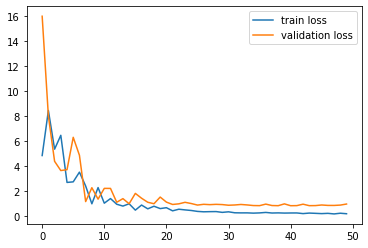

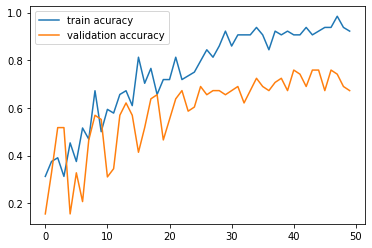

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()
plt.savefig('loss_values')

plt.plot(r.history['accuracy'], label='train acuracy')
plt.plot(r.history['val_accuracy'], label= 'validation accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy_values')

In [36]:
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [37]:
y_pred = model.predict(test_set)
y_pred

array([[2.03794405e-01, 2.78240353e-01, 5.17965257e-01],
       [8.62974823e-01, 1.22551665e-01, 1.44735547e-02],
       [5.69830127e-02, 2.61276811e-01, 6.81740224e-01],
       [2.38098316e-02, 3.87600243e-01, 5.88589907e-01],
       [5.83045222e-02, 6.79561198e-01, 2.62134254e-01],
       [5.17905116e-01, 1.37144387e-01, 3.44950497e-01],
       [2.69088540e-02, 8.64642739e-01, 1.08448431e-01],
       [2.89527327e-03, 8.51650953e-01, 1.45453736e-01],
       [1.51598565e-02, 8.57608795e-01, 1.27231330e-01],
       [6.30186200e-01, 5.06950310e-03, 3.64744306e-01],
       [6.15612546e-04, 6.08431518e-01, 3.90952826e-01],
       [3.22116204e-02, 1.42547372e-03, 9.66362894e-01],
       [1.74673330e-02, 8.44294652e-02, 8.98103178e-01],
       [1.78543642e-01, 2.62855798e-01, 5.58600545e-01],
       [5.11667738e-03, 8.84955764e-01, 1.09927535e-01],
       [3.07732150e-02, 1.64126381e-01, 8.05100381e-01],
       [2.25692848e-03, 1.20305018e-02, 9.85712528e-01],
       [9.61654663e-01, 1.01443

In [38]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2])

In [39]:
from tensorflow.keras.preprocessing import image

In [40]:
model = load_model('model_resnet50.h5')

In [41]:
img = image.load_img('/content/drive/MyDrive/Test/lamborghini/11.jpg', target_size=(224,224))

In [42]:
x = image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [43]:
x.shape

(224, 224, 3)

In [44]:
x=x/255

In [45]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [46]:
y = model.predict(img_data)

In [47]:
a = np.argmax(y, axis=1)

In [48]:
a

array([2])